### 1. Build a logistic regression model. 
#### Doing so: What is the best predictor of diabetes and what is the AUC of this model?


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [8]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

# Split the dataset into training and testing sets
X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model using the training set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

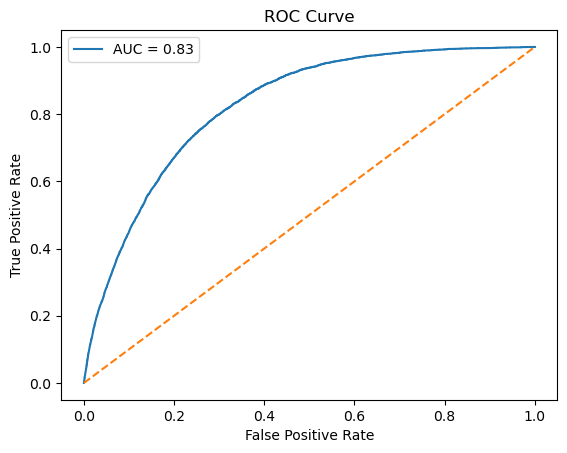

The best predictor of diabetes is 'HighBP' with a coefficient of 0.7635.
The AUC of the logistic regression model is 0.8252.


In [3]:
# Evaluate the model performance, identify the best predictor, and calculate the AUC
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

# Identify the best predictor
coefficients = model.coef_[0]
best_predictor_index = coefficients.argmax()
best_predictor = X.columns[best_predictor_index]

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"The best predictor of diabetes is '{best_predictor}' with a coefficient of {coefficients[best_predictor_index]:.4f}.")
print(f"The AUC of the logistic regression model is {auc:.4f}.")


In [57]:
# Compute feature importance scores using permutation importance
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Print importance scores for each feature
importance_scores = dict(zip(data.columns[:-1], result.importances_mean))
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_scores:
    print(f"{feature}: {importance:.4f}")

# Output the best predictor and AUC score
best_predictor = sorted_scores[0][0]
print(f"\nBest predictor: {best_predictor}")

HighChol: 0.0073
NotAbleToAffordDoctor: 0.0061
HighBP: 0.0027
Diabetes: 0.0026
BiologicalSex: 0.0020
Vegetables: 0.0007
HardToClimbStairs: 0.0005
MentalHealth: 0.0004
EducationBracket: 0.0004
PhysicalHealth: 0.0003
Myocardial: 0.0003
AgeBracket: 0.0002
Stroke: 0.0002
PhysActivity: 0.0001
GeneralHealth: 0.0001
Fruit: 0.0001
IncomeBracket: 0.0000
HeavyDrinker: -0.0000
HasHealthcare: -0.0000
Smoker: -0.0000
BMI: -0.0000

Best predictor: HighChol


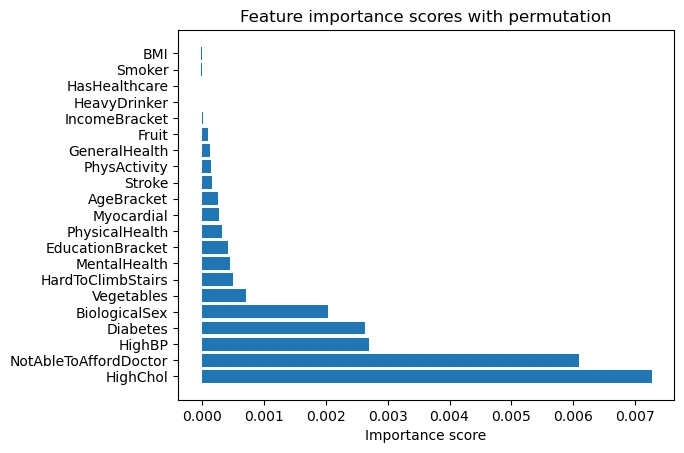

In [58]:
# Plot importance scores
fig, ax = plt.subplots()
ax.barh([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
ax.set_xlabel('Importance score')
ax.set_title('Feature importance scores with permutation')
plt.show()

### 2. Build a SVM.

#### Doing so:  What is the best predictor of diabetes and what is the AUC of this model? 

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [62]:
# Set up hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(dual=False, random_state=42, max_iter=10000), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train the SVM model using the best parameters found by GridSearchCV
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LinearSVC(C=10, dual=False, max_iter=10000, random_state=42)

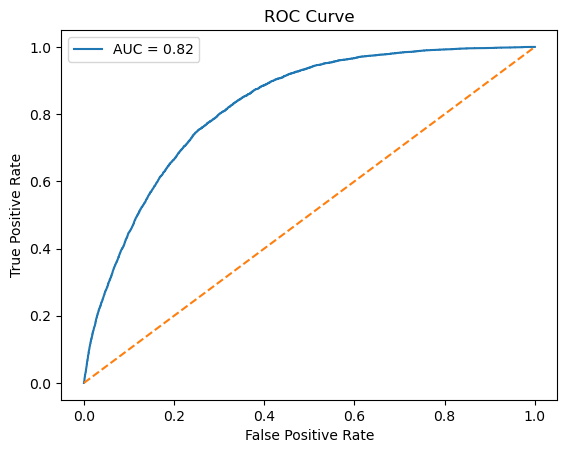

The best predictor of diabetes using the SVM model is 'HighBP' with a coefficient of 0.1697.
The AUC of the SVM model with parallel processing and hyperparameter tuning is 0.8247.


In [63]:
# Evaluate the model performance, identify the best predictor, and calculate the AUC
y_pred = best_model.decision_function(X_test)
auc = roc_auc_score(y_test, y_pred)

# Identify the best predictor
coefficients = best_model.coef_[0]
best_predictor_index = coefficients.argmax()
best_predictor = X.columns[best_predictor_index]

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"The best predictor of diabetes using the SVM model is '{best_predictor}' with a coefficient of {coefficients[best_predictor_index]:.4f}.")
print(f"The AUC of the SVM model with parallel processing and hyperparameter tuning is {auc:.4f}.")

In [65]:
# Compute feature importance scores using permutation importance
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Print importance scores for each feature
importance_scores = dict(zip(data.columns[:-1], result.importances_mean))
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_scores:
    print(f"{feature}: {importance:.4f}")

# Output the best predictor and AUC score
best_predictor = sorted_scores[0][0]
print(f"\nBest predictor: {best_predictor}")

HighChol: 0.0035
NotAbleToAffordDoctor: 0.0027
Diabetes: 0.0014
HighBP: 0.0010
PhysicalHealth: 0.0010
BiologicalSex: 0.0009
Stroke: 0.0006
EducationBracket: 0.0005
Smoker: 0.0004
Vegetables: 0.0003
BMI: 0.0000
Myocardial: -0.0000
HasHealthcare: -0.0000
HeavyDrinker: -0.0000
IncomeBracket: -0.0001
PhysActivity: -0.0001
HardToClimbStairs: -0.0001
Fruit: -0.0001
AgeBracket: -0.0002
GeneralHealth: -0.0004
MentalHealth: -0.0005

Best predictor: HighChol


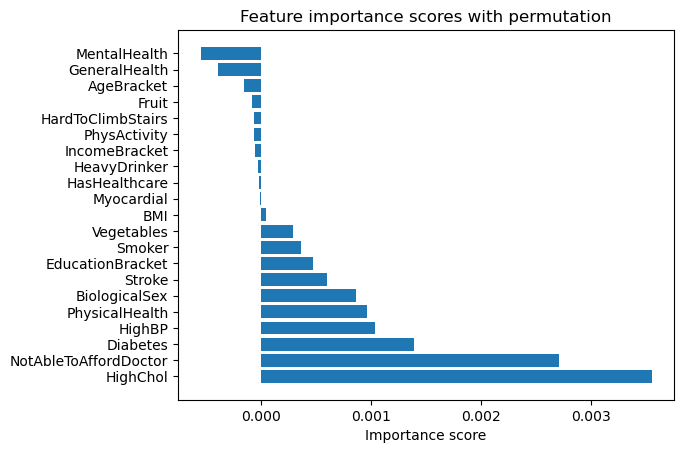

In [66]:
# Plot importance scores
fig, ax = plt.subplots()
ax.barh([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
ax.set_xlabel('Importance score')
ax.set_title('Feature importance scores with permutation')
plt.show()

### 3. Use a single, individual decision tree. 
#### Doing so: What is the best predictor of diabetes and what is the AUC of this model?

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

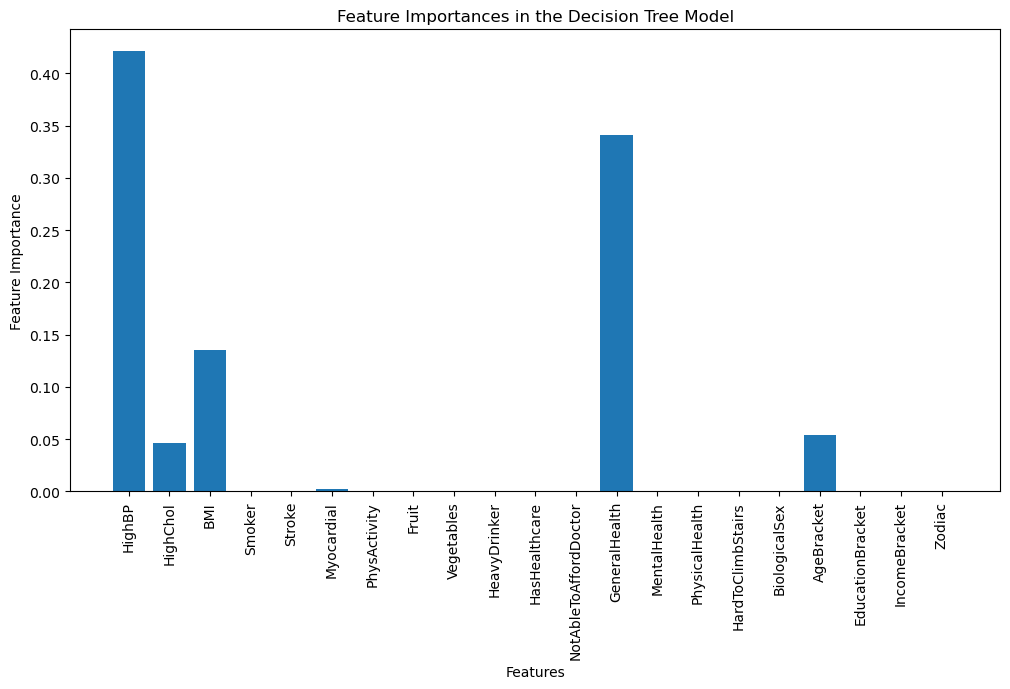

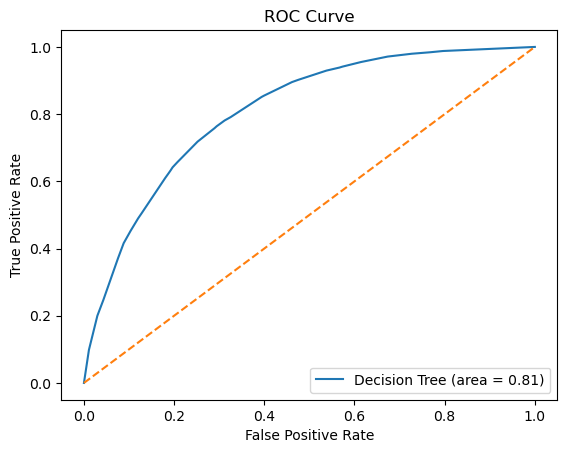

Best predictor: HighBP
AUC: 0.8091
HighBP: 0.4210
HighChol: 0.0466
BMI: 0.1349
Smoker: 0.0000
Stroke: 0.0000
Myocardial: 0.0023
PhysActivity: 0.0000
Fruit: 0.0000
Vegetables: 0.0000
HeavyDrinker: 0.0000
HasHealthcare: 0.0000
NotAbleToAffordDoctor: 0.0000
GeneralHealth: 0.3414
MentalHealth: 0.0000
PhysicalHealth: 0.0000
HardToClimbStairs: 0.0000
BiologicalSex: 0.0000
AgeBracket: 0.0538
EducationBracket: 0.0000
IncomeBracket: 0.0000
Zodiac: 0.0000


In [30]:
# Split the dataset into training and testing sets
X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single decision tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = tree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Find the best predictor
importance = tree.feature_importances_
best_predictor_index = importance.argmax()
best_predictor = X.columns[best_predictor_index]


# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in the Decision Tree Model")
plt.xticks(rotation=90)
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Best predictor: {best_predictor}")
print(f"AUC: {roc_auc:.4f}")
# Print the feature importance scores
for feature, importance_score in zip(X.columns, importance):
    print(f"{feature}: {importance_score:.4f}")


In [32]:
from sklearn.inspection import permutation_importance
# Compute feature importance scores using permutation importance
result = permutation_importance(
    tree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Print importance scores for each feature
importance_scores = dict(zip(data.columns[:-1], result.importances_mean))
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_scores:
    print(f"{feature}: {importance:.4f}")

# Output the best predictor and AUC score
best_predictor = sorted_scores[0][0]
print(f"\nBest predictor: {best_predictor}")

HighChol: 0.0050
NotAbleToAffordDoctor: 0.0043
HighBP: 0.0032
Diabetes: 0.0029
BMI: 0.0000
Smoker: 0.0000
Stroke: 0.0000
Myocardial: 0.0000
PhysActivity: 0.0000
Fruit: 0.0000
Vegetables: 0.0000
HeavyDrinker: 0.0000
HasHealthcare: 0.0000
GeneralHealth: 0.0000
MentalHealth: 0.0000
PhysicalHealth: 0.0000
HardToClimbStairs: 0.0000
BiologicalSex: 0.0000
AgeBracket: 0.0000
EducationBracket: 0.0000
IncomeBracket: 0.0000

Best predictor: HighChol


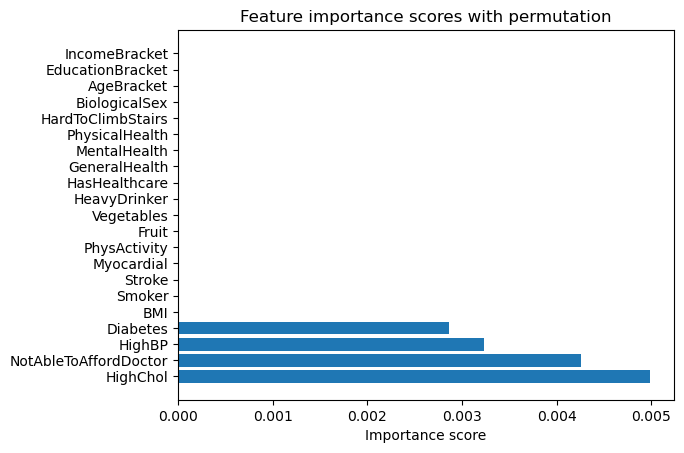

In [33]:
# Plot importance scores
fig, ax = plt.subplots()
ax.barh([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
ax.set_xlabel('Importance score')
ax.set_title('Feature importance scores with permutation')
plt.show()

### 4. Build a random forest model.
####  Doing so: What is the best predictor of diabetes and what is the AUC of this model?

In [34]:
from sklearn.ensemble import RandomForestClassifier

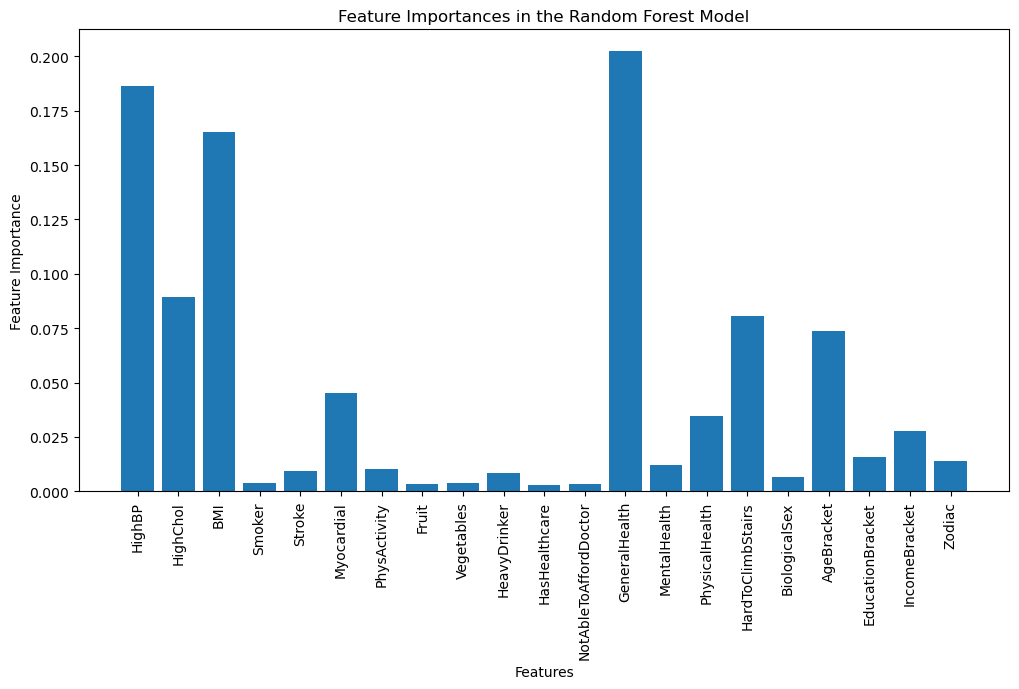

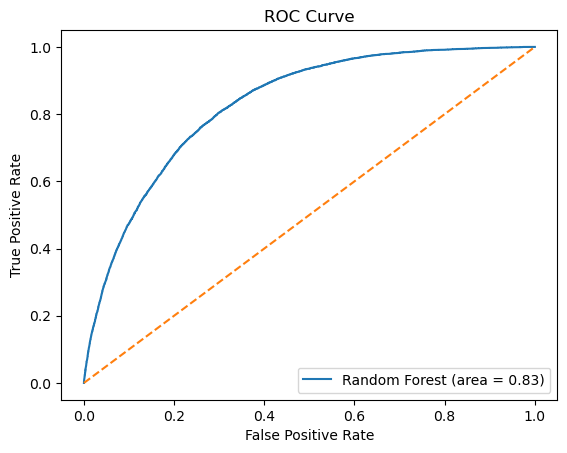

Best predictor: GeneralHealth
AUC: 0.8290
HighBP: 0.1863
HighChol: 0.0892
BMI: 0.1652
Smoker: 0.0041
Stroke: 0.0095
Myocardial: 0.0452
PhysActivity: 0.0103
Fruit: 0.0035
Vegetables: 0.0039
HeavyDrinker: 0.0083
HasHealthcare: 0.0031
NotAbleToAffordDoctor: 0.0035
GeneralHealth: 0.2023
MentalHealth: 0.0123
PhysicalHealth: 0.0345
HardToClimbStairs: 0.0807
BiologicalSex: 0.0068
AgeBracket: 0.0736
EducationBracket: 0.0158
IncomeBracket: 0.0280
Zodiac: 0.0140


In [43]:
# Train a random forest model with adjusted parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
forest.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Find the best predictor
importance = forest.feature_importances_
best_predictor_index = importance.argmax()
best_predictor = X.columns[best_predictor_index]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in the Random Forest Model")
plt.xticks(rotation=90)
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Best predictor: {best_predictor}")
print(f"AUC: {roc_auc:.4f}")

# Print the feature importance scores
for feature, importance_score in zip(X.columns, importance):
    print(f"{feature}: {importance_score:.4f}")


In [45]:

# Compute feature importance scores using permutation importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Print importance scores for each feature
importance_scores = dict(zip(data.columns[:-1], result.importances_mean))
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_scores:
    print(f"{feature}: {importance:.4f}")

# Output the best predictor 
best_predictor = sorted_scores[0][0]
print(f"\nBest predictor: {best_predictor}")

HighChol: 0.0045
NotAbleToAffordDoctor: 0.0025
HighBP: 0.0024
Diabetes: 0.0023
PhysicalHealth: 0.0011
BiologicalSex: 0.0006
Stroke: 0.0005
EducationBracket: 0.0005
Vegetables: 0.0004
MentalHealth: 0.0003
HardToClimbStairs: 0.0002
Myocardial: 0.0001
GeneralHealth: 0.0001
PhysActivity: 0.0001
HeavyDrinker: 0.0000
Smoker: 0.0000
HasHealthcare: 0.0000
Fruit: 0.0000
BMI: 0.0000
IncomeBracket: 0.0000
AgeBracket: -0.0002

Best predictor: HighChol


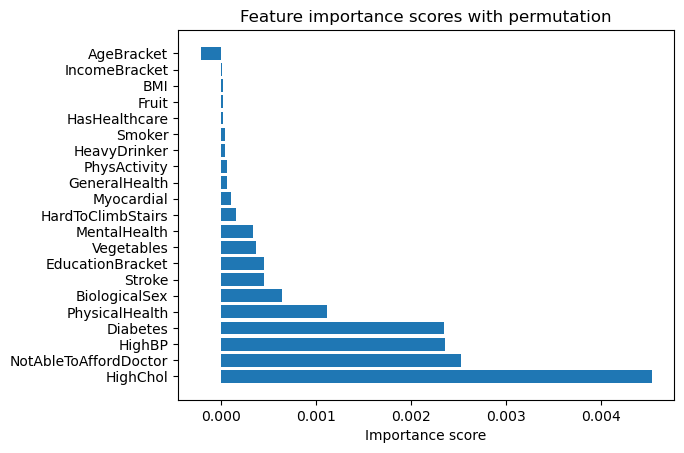

In [46]:
# Plot importance scores
fig, ax = plt.subplots()
ax.barh([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
ax.set_xlabel('Importance score')
ax.set_title('Feature importance scores with permutation')
plt.show()

### 5. Build a model using adaBoost.
#### Doing so: What is the best predictor of diabetes and what is the AUC of this model?

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

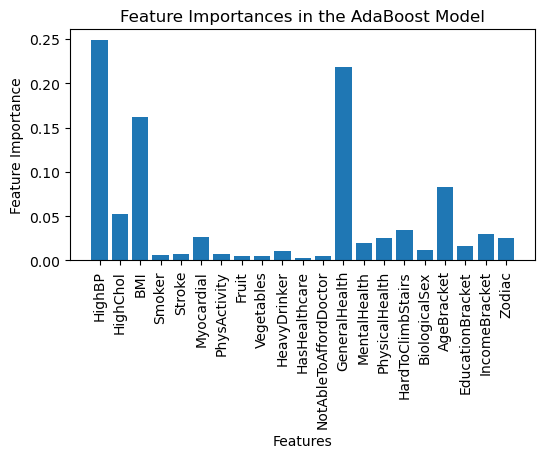

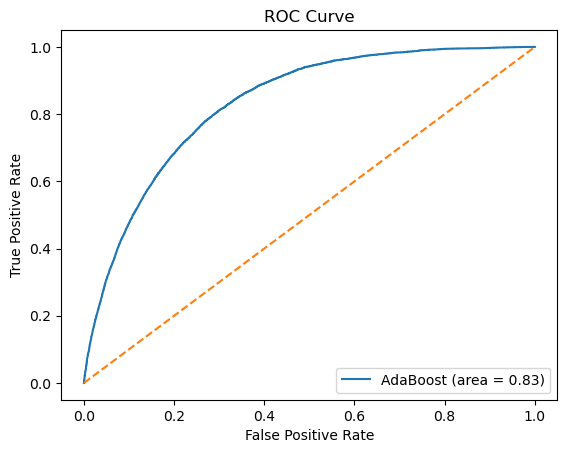

Best predictor: HighBP
AUC: 0.8318


In [70]:
# Train an AdaBoost model with Gradient Boosting
adaboost = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=100,
    min_samples_leaf=50,
    subsample=0.8,
    random_state=42
)
adaboost.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = adaboost.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Find the best predictor
importance = adaboost.feature_importances_
best_predictor_index = importance.argmax()
best_predictor = X.columns[best_predictor_index]

# Plot feature importances
plt.figure(figsize=(6, 3))
plt.bar(X.columns, importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in the AdaBoost Model")
plt.xticks(rotation=90)
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AdaBoost (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Best predictor: {best_predictor}")
print(f"AUC: {roc_auc:.4f}")

In [40]:
print(f"Best predictor: {best_predictor}")
print(f"AUC: {roc_auc:.4f}")
# Print the feature importance scores
for feature, importance_score in zip(X.columns, importance):
    print(f"{feature}: {importance_score:.4f}")

Best predictor: HighBP
AUC: 0.8318
HighBP: 0.2484
HighChol: 0.0527
BMI: 0.1624
Smoker: 0.0056
Stroke: 0.0073
Myocardial: 0.0259
PhysActivity: 0.0067
Fruit: 0.0054
Vegetables: 0.0051
HeavyDrinker: 0.0101
HasHealthcare: 0.0027
NotAbleToAffordDoctor: 0.0049
GeneralHealth: 0.2188
MentalHealth: 0.0195
PhysicalHealth: 0.0248
HardToClimbStairs: 0.0341
BiologicalSex: 0.0116
AgeBracket: 0.0831
EducationBracket: 0.0164
IncomeBracket: 0.0296
Zodiac: 0.0248


In [41]:
from sklearn.inspection import permutation_importance
# Compute feature importance scores using permutation importance
result = permutation_importance(
    adaboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Print importance scores for each feature
importance_scores = dict(zip(data.columns[:-1], result.importances_mean))
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_scores:
    print(f"{feature}: {importance:.4f}")

# Output the best predictor 
best_predictor = sorted_scores[0][0]
print(f"\nBest predictor: {best_predictor}")

HighChol: 0.0068
NotAbleToAffordDoctor: 0.0050
BiologicalSex: 0.0022
HighBP: 0.0022
Diabetes: 0.0019
Stroke: 0.0010
HardToClimbStairs: 0.0008
PhysicalHealth: 0.0007
Vegetables: 0.0006
AgeBracket: 0.0005
BMI: 0.0003
MentalHealth: 0.0003
GeneralHealth: 0.0002
HeavyDrinker: 0.0002
PhysActivity: 0.0002
HasHealthcare: 0.0002
EducationBracket: 0.0001
Myocardial: 0.0001
Smoker: 0.0000
IncomeBracket: -0.0000
Fruit: -0.0002

Best predictor: HighChol


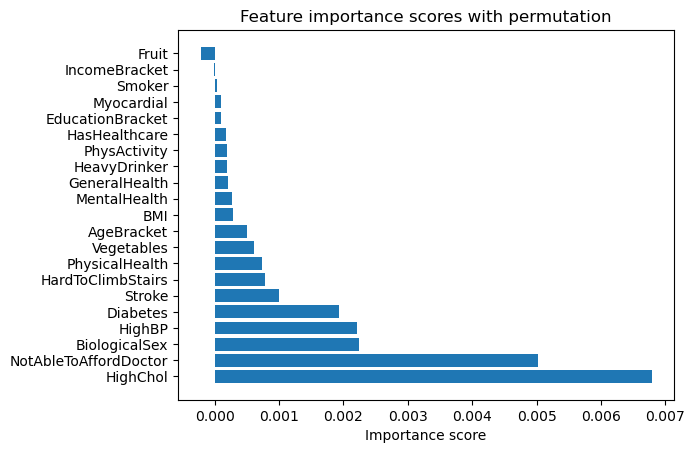

In [42]:
# Plot importance scores
fig, ax = plt.subplots()
ax.barh([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
ax.set_xlabel('Importance score')
ax.set_title('Feature importance scores with permutation')
plt.show()

### Extra Credits

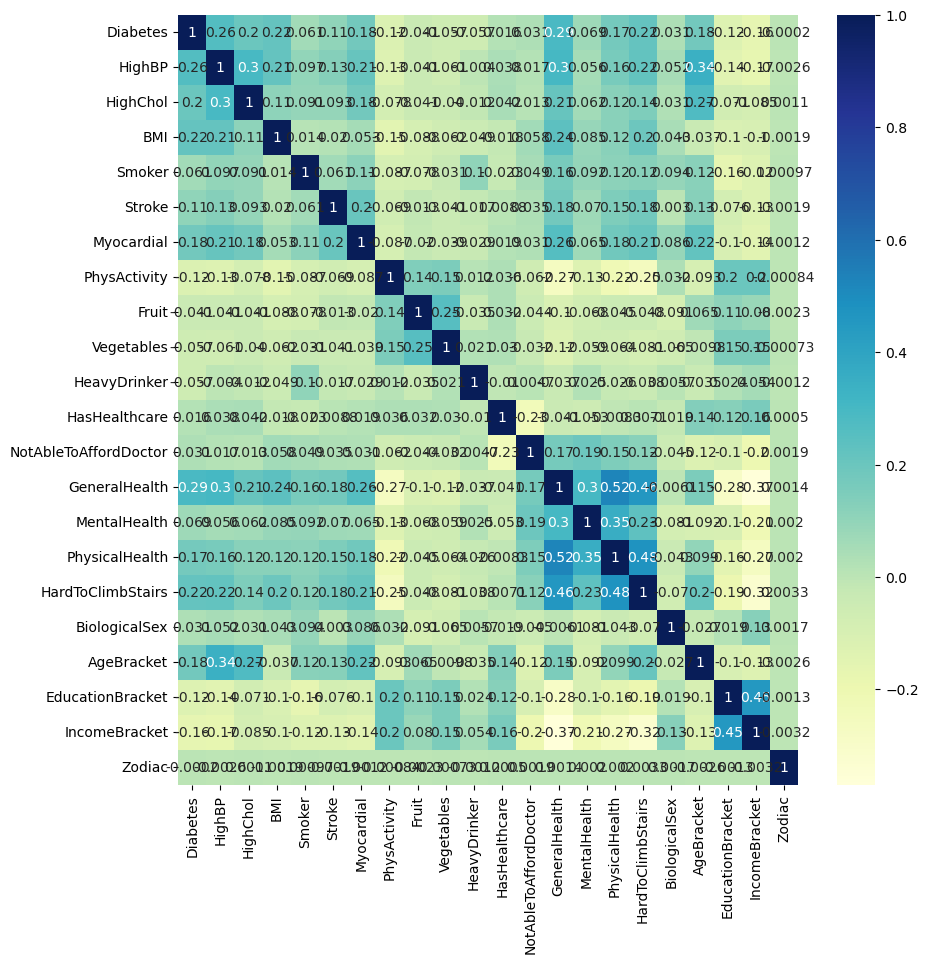

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(10,10))

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()


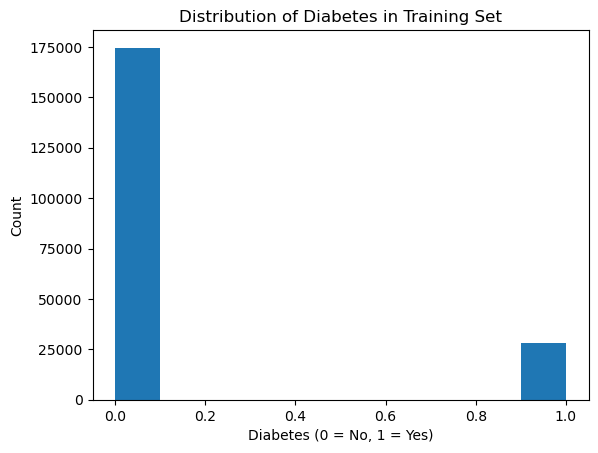

In [67]:
import matplotlib.pyplot as plt

# Assuming y_train is the target variable of the training set
plt.hist(y_train)
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes in Training Set')
plt.show()
